In [4]:
%matplotlib inline

# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics

# Load in csv
ride_data_to_load = "Resources/ride_data.csv"
city_data_to_load = "Resources/city_data.csv"

#read csv
ride_data_df = pd.read_csv(ride_data_to_load)
city_data_df = pd.read_csv(city_data_to_load)

In [7]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [8]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [9]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [10]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [11]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [12]:
# Get the number of data points from the Suburban cities.
sum(city_data_df["type"]=="Suburban")

36

In [13]:
# Get the number of data points from the Rural cities.
sum(city_data_df["type"]=="Rural")

18

In [15]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [14]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [16]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [19]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [21]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [24]:
# Create the Rural and Suburban city DataFrame.
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]

In [26]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [27]:
# Get the number of rides for urban cities.
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [28]:
# Get the number of rides for suburban cities.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [29]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [30]:
# Get average fare for each city in the suburban cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [31]:
# Get average fare for each city in the rural cities.
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [32]:
# Get average driver count for each city in the urban cities.
urban_avg_drivers = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_avg_drivers.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [33]:
# Get average driver count for each city in the suburban cities.
suburban_avg_drivers = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_avg_drivers.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [34]:
# Get average driver count for each city in the rural cities.
rural_avg_drivers = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_avg_drivers.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

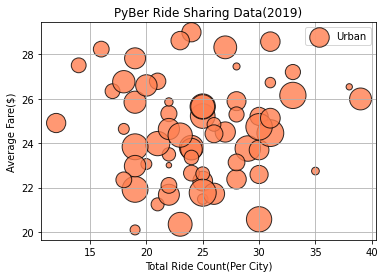

In [52]:
plt.scatter(urban_ride_count,urban_avg_fare, s = 10*urban_avg_drivers, 
            label="Urban", c="coral", edgecolor="black", linewidth=1,alpha=0.8)

plt.xlabel("Total Ride Count(Per City)")
plt.ylabel("Average Fare($)")

plt.grid(True)
plt.title("PyBer Ride Sharing Data(2019)")

plt.legend()

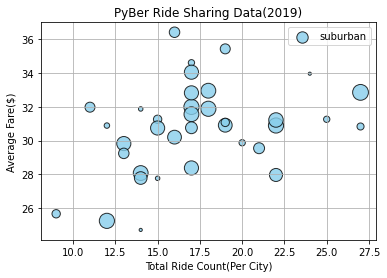

In [53]:
plt.scatter(suburban_ride_count,suburban_avg_fare, s = 10*suburban_avg_drivers, 
            label="suburban", c="skyblue", edgecolor="black", linewidth=1,alpha=0.8)

plt.xlabel("Total Ride Count(Per City)")
plt.ylabel("Average Fare($)")

plt.grid(True)
plt.title("PyBer Ride Sharing Data(2019)")

plt.legend()

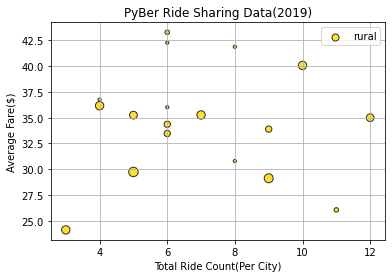

In [54]:
plt.scatter(rural_ride_count,rural_avg_fare, s = 10*rural_avg_drivers, 
            label="rural", c="gold", edgecolor="black", linewidth=1,alpha=0.8)

plt.xlabel("Total Ride Count(Per City)")
plt.ylabel("Average Fare($)")

plt.grid(True)
plt.title("PyBer Ride Sharing Data(2019)")

plt.legend()

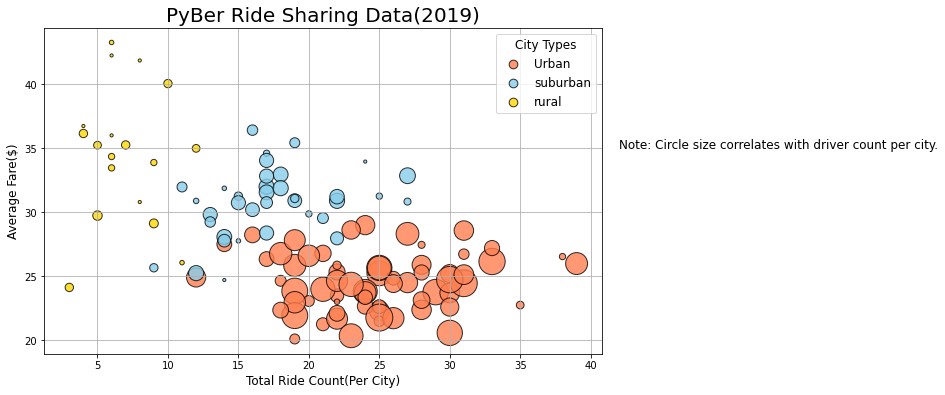

In [66]:
plt.subplots(figsize=(10, 6))

plt.scatter(urban_ride_count,urban_avg_fare, s = 10*urban_avg_drivers, 
            label="Urban", c="coral", edgecolor="black", linewidth=1,alpha=0.8)

plt.scatter(suburban_ride_count,suburban_avg_fare, s = 10*suburban_avg_drivers, 
            label="suburban", c="skyblue", edgecolor="black", linewidth=1,alpha=0.8)

plt.scatter(rural_ride_count,rural_avg_fare, s = 10*rural_avg_drivers, 
            label="rural", c="gold", edgecolor="black", linewidth=1,alpha=0.8)

plt.xlabel("Total Ride Count(Per City)", fontsize=12)
plt.ylabel("Average Fare($)", fontsize=12)

plt.grid(True)
plt.title("PyBer Ride Sharing Data(2019)", fontsize=20)

plt.legend()

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.png")